# 218. Introduction to Principal Component Analysis

# 219. PCA Theory and Intuition - Part One

# 220. PCA Theory and Intuition - Part Two

# 221. PCA - Manual Implementation in Python

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [53]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

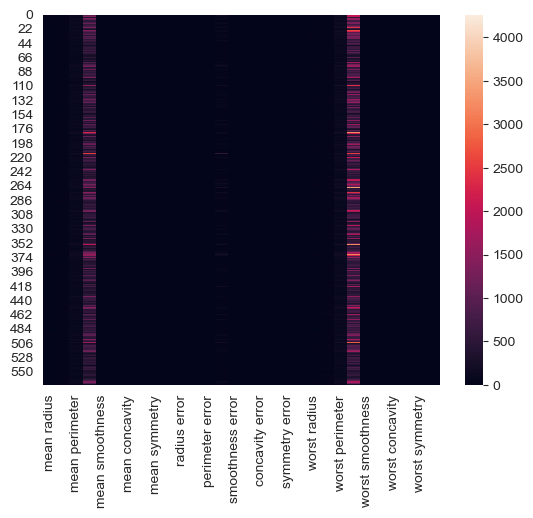

In [54]:
sns.heatmap(df)

In [55]:
# Principal Component Analysis

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X = scaler.fit_transform(df)

In [59]:
scaled_X - scaled_X.mean(axis=0)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [60]:
covariance_matrix = np.cov(scaled_X, rowvar=False)

In [61]:
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

In [62]:
eigen_values

array([1.33279057e-04, 7.50121413e-04, 1.59213600e-03, 6.91261258e-03,
       8.19203712e-03, 1.55085271e-02, 1.80867940e-02, 2.43836914e-02,
       2.74877113e-02, 3.00256631e-02, 3.12142606e-02, 4.95647002e-02,
       5.27114222e-02, 5.95036135e-02, 8.00034045e-02, 9.43006956e-02,
       1.57286149e-01, 2.41782421e-01, 2.61621161e-01, 2.94433153e-01,
       3.51310875e-01, 4.17628782e-01, 4.77456255e-01, 6.76408882e-01,
       1.20948224e+00, 1.65163324e+00, 1.98412752e+00, 2.82291016e+00,
       5.70137460e+00, 1.33049908e+01])

In [63]:
eigen_vectors

array([[-7.02414091e-01,  2.11460455e-01,  2.11194013e-01,
         1.31526670e-01,  1.29476396e-01, -1.92264989e-02,
        -1.82579441e-01, -9.85526942e-02, -7.29289034e-02,
        -6.85700057e-02, -4.96986642e-02, -2.25384659e-01,
         1.46712338e-01,  2.02924255e-01,  1.50583883e-01,
        -5.11187749e-02, -5.95061348e-02,  1.19672116e-02,
         5.10674568e-02,  4.14714866e-02, -9.54864432e-02,
         2.23109764e-01, -7.45229622e-03,  1.24088340e-01,
        -1.87407904e-02,  3.77863538e-02, -4.14089623e-02,
         8.53124284e-03,  2.33857132e-01, -2.18902444e-01],
       [-2.73661018e-04, -1.05339342e-02, -6.58114593e-05,
         1.73573093e-02,  2.45566636e-02,  8.47459309e-02,
         9.87867898e-02, -5.54997454e-04, -9.48006326e-02,
         4.48369467e-01, -2.44134993e-01, -2.97886446e-02,
        -4.11029851e-02, -3.87061187e-02,  1.57841960e-01,
        -1.07922421e-01,  2.15600995e-02,  2.03461333e-01,
         2.54896423e-01, -3.02243402e-01, -2.40934066e-

In [64]:
num_components = 2

In [65]:
np.argsort([2, 1, 3])

array([1, 0, 2], dtype=int64)

In [66]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [67]:
sorted_eigenvalues = eigen_values[sorted_key]
sorted_eigenvectors = eigen_vectors[:, sorted_key]

In [68]:
principal_components = np.dot(scaled_X, sorted_eigenvectors)

In [69]:

principal_components

array([[ -9.19283683,  -1.94858307],
       [ -2.3878018 ,   3.76817174],
       [ -5.73389628,   1.0751738 ],
       ...,
       [ -1.25617928,   1.90229671],
       [-10.37479406,  -1.67201011],
       [  5.4752433 ,   0.67063679]])

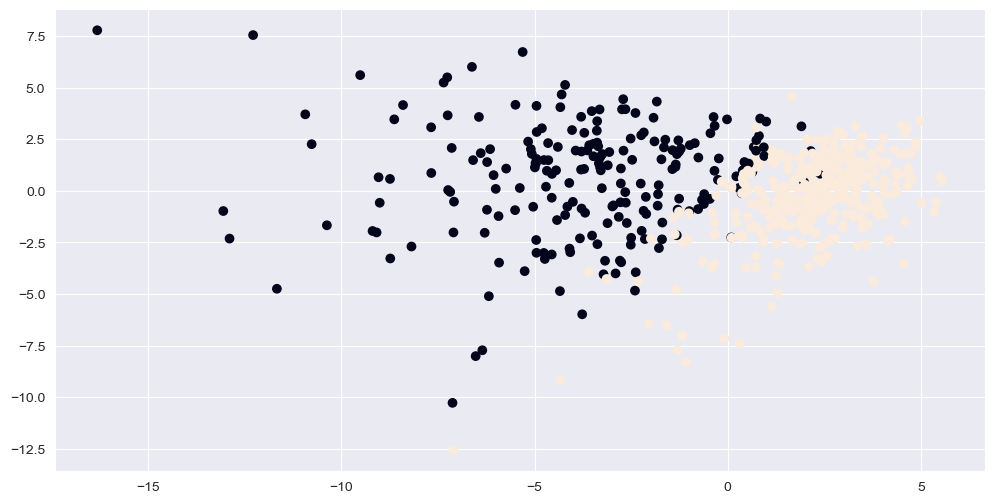

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

In [72]:
from sklearn.datasets import load_breast_cancer

In [74]:
cancer_dictionary = load_breast_cancer()

In [75]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [76]:
cancer_dictionary['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [77]:
cancer_dictionary['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [79]:
print(cancer_dictionary['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

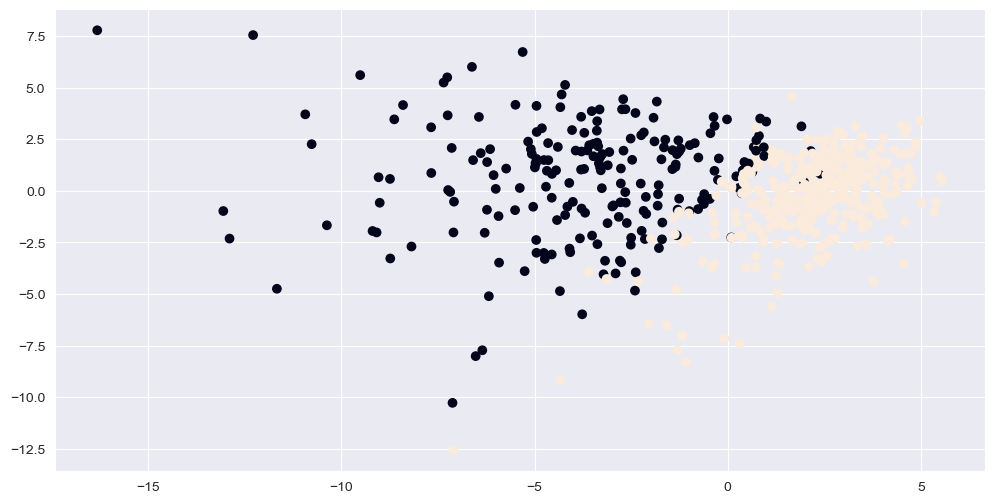

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cancer_dictionary['target'])

# 222. PCA - SciKit-Learn